In [1]:
!pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('df_2t_encoded.csv')


# Visualizar las primeras filas del DataFrame
df.head()


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
0,2016,2,407473,23.0,4.52,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
1,2016,2,407481,21.0,4.52,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2016,2,407536,22.0,4.52,True,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,2016,2,407546,23.0,4.52,True,False,False,False,True,...,True,False,True,False,False,False,True,True,False,False
4,2016,2,407550,34.0,4.52,True,False,False,False,True,...,True,True,False,False,False,False,True,True,False,False


In [3]:
dimensiones =df.shape
# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 29082
Número de columnas: 55


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Inicializa un DataFrame vacío para las predicciones
df_predicciones = pd.DataFrame()

# Itera sobre cada año
for gestion in range(2016, 2020):
    # Filtra las filas correspondientes a cada año
    df_year = df[df['gestion'] == gestion]
    
    # Divide los datos para entrenamiento (90%) y predicciones (10%)
    df_train, df_predict = train_test_split(df_year, test_size=0.1, random_state=42)
    
    # Agrega las muestras de predicciones al DataFrame de predicciones
    df_predicciones = pd.concat([df_predicciones, df_predict], ignore_index=True)
    
    # Elimina las muestras de predicciones del DataFrame original
    df = df.drop(df_predict.index)

# El DataFrame df ahora contiene el 80% de los datos originales para entrenamiento
# El DataFrame df_predicciones contiene el 20% restante para predicciones


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26172 entries, 0 to 29079
Data columns (total 55 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   gestion                                                                26172 non-null  int64  
 1   trimestre                                                              26172 non-null  int64  
 2   id_persona                                                             26172 non-null  int64  
 3   Edad                                                                   26172 non-null  float64
 4   tasa_desempleo                                                         26172 non-null  float64
 5   peao_Si                                                                26172 non-null  bool   
 6   depto_Chuquisaca                                                       26172 non-null  bool

In [6]:
df_predicciones

,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
0,2016,2,423699,53.0,4.52,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
1,2016,2,576595,29.0,4.52,True,False,False,True,False,...,True,False,True,False,False,False,True,True,False,False
2,2016,2,573197,55.0,4.52,True,True,False,False,False,...,True,True,False,False,False,False,True,True,False,False
3,2016,2,448290,43.0,4.52,True,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
4,2016,2,547917,47.0,4.52,True,False,False,False,False,...,True,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2019,2,2456915,37.0,4.89,True,False,False,False,False,...,True,True,False,False,False,False,True,False,False,True
2906,2019,2,2563916,31.0,4.89,True,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2907,2019,2,2538919,57.0,4.89,True,False,False,True,False,...,True,False,True,False,False,False,True,True,False,False
2908,2019,2,2422481,47.0,4.89,True,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False


In [7]:
import numpy as np

# Obtén el número de filas para la mitad de los datos
mitad_filas = len(df_predicciones) // 2

# Asigna aleatoriamente la gestión 2020 y 2021 a las filas seleccionadas
indices_2020 = np.random.choice(df_predicciones.index, size=mitad_filas, replace=False)
df_predicciones.loc[indices_2020, 'gestion'] = 2020
df_predicciones.loc[~df_predicciones.index.isin(indices_2020), 'gestion'] = 2021




In [8]:
import numpy as np

df_predicciones['tasa_desempleo'] = np.nan

In [9]:
df_predicciones

,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
0,2020,2,423699,53.0,NaN,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
1,2020,2,576595,29.0,NaN,True,False,False,True,False,...,True,False,True,False,False,False,True,True,False,False
2,2020,2,573197,55.0,NaN,True,True,False,False,False,...,True,True,False,False,False,False,True,True,False,False
3,2020,2,448290,43.0,NaN,True,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
4,2021,2,547917,47.0,NaN,True,False,False,False,False,...,True,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2021,2,2456915,37.0,NaN,True,False,False,False,False,...,True,True,False,False,False,False,True,False,False,True
2906,2021,2,2563916,31.0,NaN,True,False,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2907,2020,2,2538919,57.0,NaN,True,False,False,True,False,...,True,False,True,False,False,False,True,True,False,False
2908,2020,2,2422481,47.0,NaN,True,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False


Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 1.55e-01
Root Mean Squared Error (RMSE): 3.94e-01
R-squared (R2): -0.02
Mean Absolute Percentage Error (MAPE): 5.48%
Adjusted R-squared: -0.03
Concordance Index (C-index): -0.02

Resultados de la validación cruzada (neg_mean_squared_error):
[-0.15358378 -0.15683918 -0.15594023 -0.15668586 -0.15240534]

Predicciones:
       gestion  predicciones
6020      2017      5.189381
8845      2017      4.880100
19477     2019      4.932120
21672     2019      4.989224
17416     2019      4.954184
...        ...           ...
20523     2019      4.991473
11183     2018      4.966750
18326     2019      5.049757
10764     2018      4.941162
22185     2019      4.915720

[3926 rows x 2 columns]


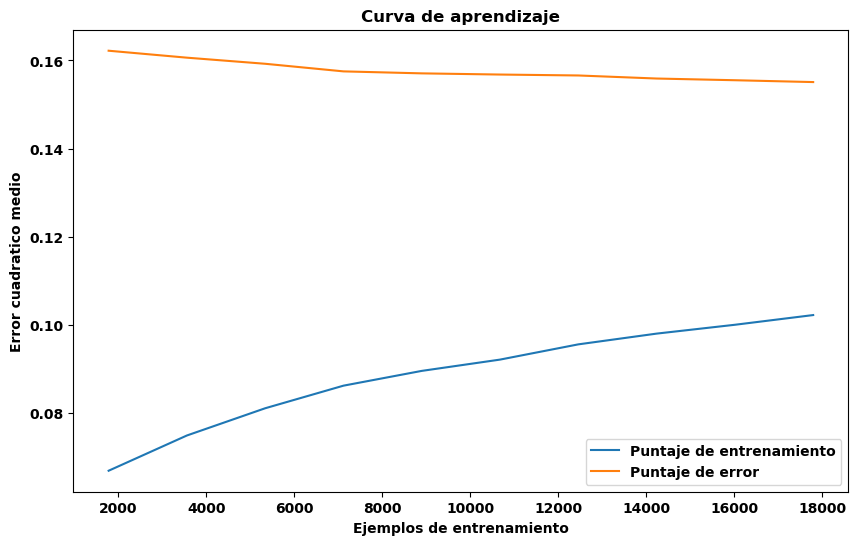

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Seleccionar las variables independientes y dependiente
X = df.drop(['tasa_desempleo'], axis=1)
y = df['tasa_desempleo']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Guardar la variable 'gestion' del conjunto de prueba antes de quitarla
gestion_test = X_test['gestion']

# Quitar las variables 'gestion', 'id_persona'  de las variables independientes
X_train = X_train.drop(['gestion', 'id_persona'], axis=1)
X_test = X_test.drop(['gestion', 'id_persona'], axis=1)

# Crear el modelo de Random Forest Regressor con los mejores hiperparámetros 
random_forest_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=42,
)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)

cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Agregar nuevamente la variable 'gestion' a las predicciones
predictions_df = pd.DataFrame({'gestion': gestion_test, 'predicciones': y_pred})

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Calcular el coeficiente de determinación ajustado
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calcular el índice de concordancia
concordance_index = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()


# Imprimir las métricas
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2e}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2e}".format(rmse))
print("R-squared (R2): {:.2f}".format(r2))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape * 100))  # Imprime MAPE como porcentaje
print("Adjusted R-squared: {:.2f}".format(adjusted_r2))
print("Concordance Index (C-index): {:.2f}".format(concordance_index))

# Imprimir los resultados de la validación cruzada 
print("\nResultados de la validación cruzada (neg_mean_squared_error):")
print(cv_scores)

# Visualizar las predicciones junto con la variable 'gestion'
print("\nPredicciones:")
print(predictions_df)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Puntaje de entrenamiento')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Puntaje de error')
plt.xlabel('Ejemplos de entrenamiento')
plt.ylabel('Error cuadratico medio')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()


In [11]:
# Calcular la media de las predicciones para cada año de gestión
mean_predictions_df = predictions_df.groupby('gestion')['predicciones'].mean().reset_index()

# Imprimir las predicciones medias
print("\nPredicciones Medias:")
print(mean_predictions_df)



Predicciones Medias:
   gestion  predicciones
0     2016      5.002521
1     2017      5.013590
2     2018      5.009416
3     2019      4.968511


Feature Importance:
                                              Feature  Importance
1                                                Edad    0.301599
11                                       Genero_Mujer    0.038181
28                                  Est_Civ_SOLTERO/A    0.032584
15                        s1_05_JEFE O JEFA DEL HOGAR    0.032399
26                                    Niv_Ed_Superior    0.027070
23                         Niv_Ed_Secundaria completa    0.026807
22                         Niv_Ed_Primaria incompleta    0.025797
14                          s1_05_HIJO/A O ENTENADO/A    0.025776
24                       Niv_Ed_Secundaria incompleta    0.024544
50                            phrs_categoria_Completo    0.021762
9                                    depto_Santa Cruz    0.021578
5                                        depto_La Paz    0.020673
4                                    depto_Cochabamba    0.019971
37  ocupacion_Trabajadores de la Construcción, Ind...   

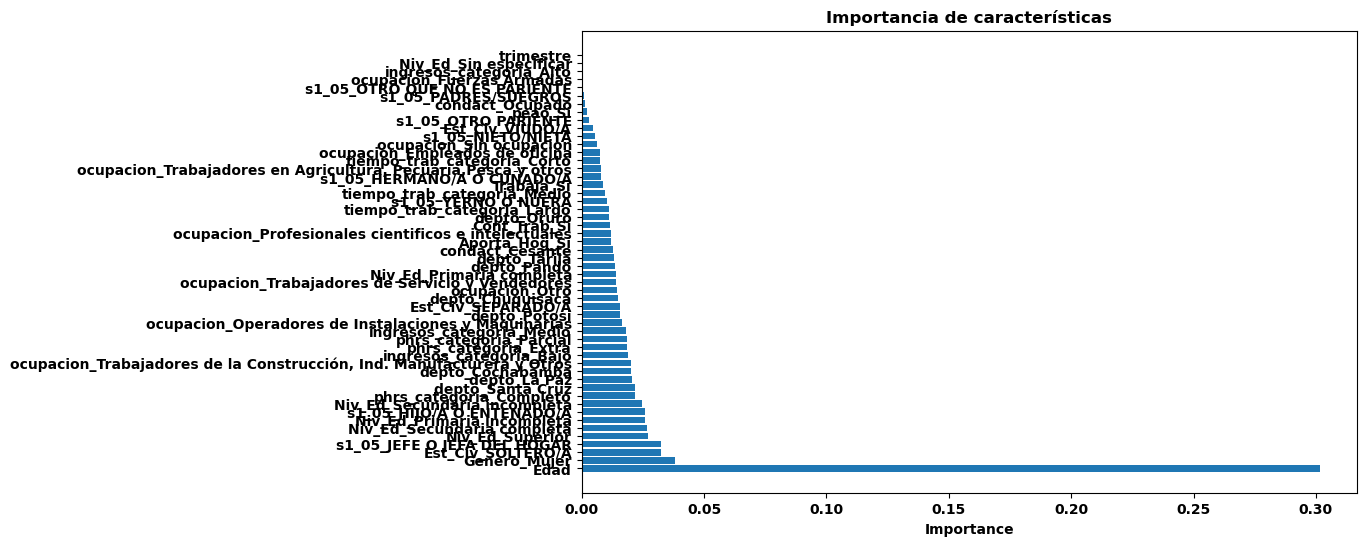

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya tienes definido tu modelo de random forest y tus datos de entrenamiento (X_train)

# Obtener la importancia de las características
feature_importance = random_forest_model.feature_importances_

# Obtener nombres de características
feature_names = X_train.columns

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Imprimir el DataFrame
print("Feature Importance:")
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Importancia de características')
plt.show()



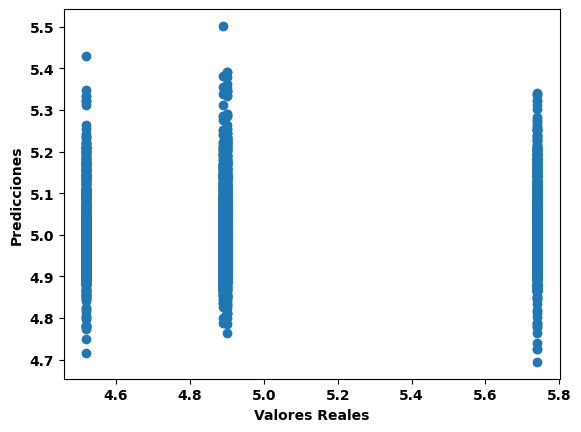

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


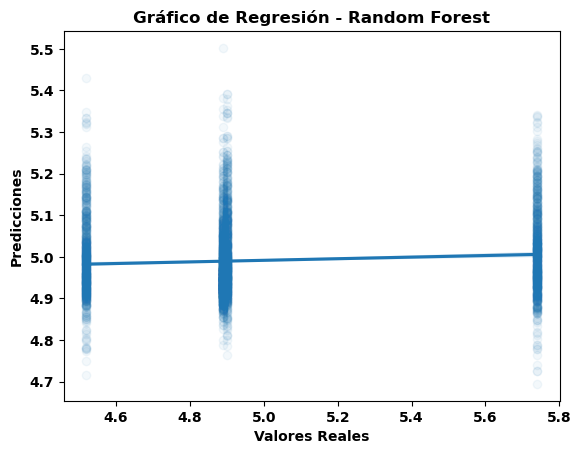

In [14]:
import seaborn as sns

# Gráfico de regresión lineal
sns.regplot(x=y_test, y=y_pred.flatten(), scatter_kws={'alpha':0.05})
plt.title('Gráfico de Regresión - Random Forest')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


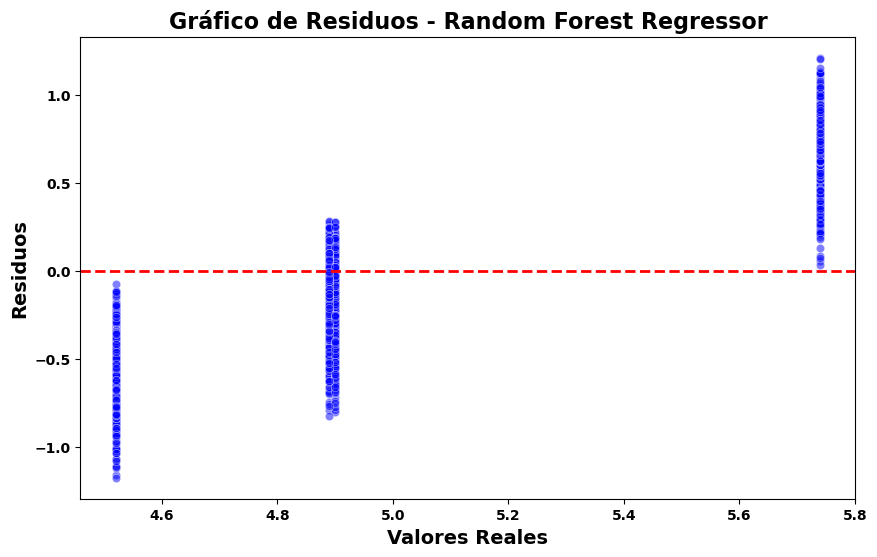

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar y entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuos = y_test - y_pred

# Crear un gráfico de dispersión de residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuos, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Línea base en cero
plt.title('Gráfico de Residuos - Random Forest Regressor', fontsize=16)
plt.xlabel('Valores Reales', fontsize=14)
plt.ylabel('Residuos', fontsize=14)
plt.show()


In [16]:
import pandas as pd
import numpy as np

# Suponiendo que ya tienes el modelo entrenado 'random_forest_model'

# Crear datos ficticios para 2020
df_predicciones_2020 = df_predicciones.copy()
df_predicciones_2020['gestion'] = 2020

# Crear datos ficticios para 2021
df_predicciones_2021 = df_predicciones.copy()
df_predicciones_2021['gestion'] = 2021

# Concatenar los datos originales con los datos ficticios para los años 2020 y 2021
df_predicciones_ficticio = pd.concat([df_predicciones_2020, df_predicciones_2021], ignore_index=True)

# Extraer las características (X) de df_predicciones_ficticio
X_predicciones_ficticio = df_predicciones_ficticio.drop(['tasa_desempleo'], axis=1)

# Guardar las variables 'Edad', 'id_persona' y 'gestion' del conjunto de prueba antes de quitarlas

id_persona_test = X_predicciones_ficticio['id_persona']
gestion_test = X_predicciones_ficticio['gestion']

# Quitar las variables 'Edad', 'id_persona' e 'gestion' de las variables independientes
X_predicciones_ficticio = X_predicciones_ficticio.drop([ 'id_persona', 'gestion'], axis=1)

# Realizar predicciones para todo el conjunto de predicciones, incluyendo los datos ficticios
y_pred_predicciones_ficticio = random_forest_model.predict(X_predicciones_ficticio)

# Asignar las predicciones al DataFrame original
df_predicciones_ficticio['Prediccion'] = y_pred_predicciones_ficticio

# Agregar nuevamente las variables 'Edad', 'id_persona' y 'gestion' a las predicciones

df_predicciones_ficticio['id_persona'] = id_persona_test
df_predicciones_ficticio['gestion'] = gestion_test

# Imprimir o visualizar las tasas de desempleo predichas para estos años ficticios
print(df_predicciones_ficticio[['gestion', 'trimestre', 'Prediccion']])




      gestion  trimestre  Prediccion
0        2020          2    4.926646
1        2020          2    5.037671
2        2020          2    4.919329
3        2020          2    5.010978
4        2020          2    4.946266
...       ...        ...         ...
5815     2021          2    4.996605
5816     2021          2    5.112142
5817     2021          2    4.932195
5818     2021          2    5.010739
5819     2021          2    4.924616

[5820 rows x 3 columns]


In [17]:
# Calcular la media para cada año
media_predicciones_por_anio = df_predicciones_ficticio.groupby(['gestion'])['Prediccion'].mean().reset_index()

# Imprimir o visualizar las medias para cada año
print(media_predicciones_por_anio)


   gestion  Prediccion
0     2020    4.991148
1     2021    4.991148


Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 1.50e-01
Root Mean Squared Error (RMSE): 3.87e-01
R-squared (R2): 0.02
Mean Absolute Percentage Error (MAPE): 5.43%
Adjusted R-squared: 0.01
Concordance Index (C-index): 0.02

Resultados de la validación cruzada (neg_mean_squared_error):
[-0.15014042 -0.15290967 -0.15133341 -0.15191697 -0.14736873]

Predicciones:
       gestion  tasa_desempleo_real  tasa_desempleo_predicha
6020      2017                 5.74                 4.994413
8845      2017                 5.74                 4.936966
19477     2019                 4.89                 4.969659
21672     2019                 4.89                 4.991910
17416     2019                 4.89                 5.011547
...        ...                  ...                      ...
20523     2019                 4.89                 5.030384
11183     2018                 4.90                 5.067494
18326     2019                 4.89                 5.005374
10764     2018   

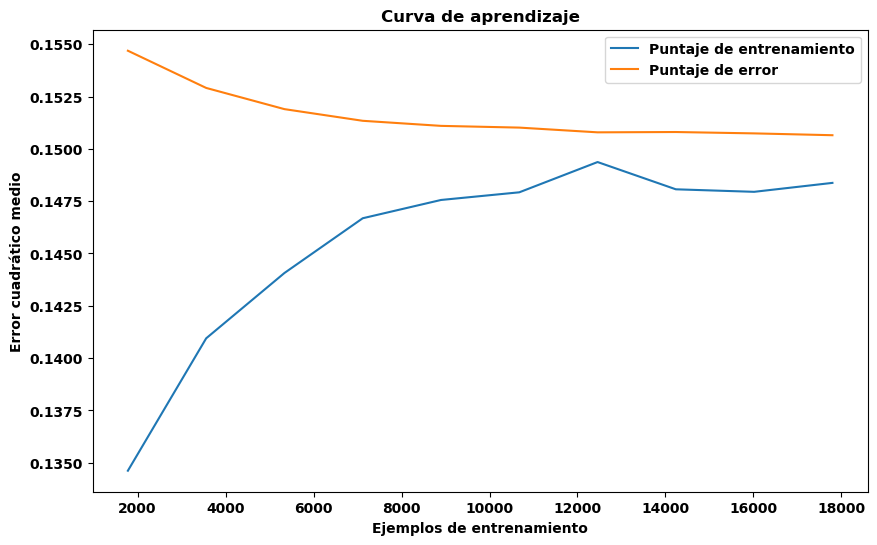


Importancia de Características:
                                       Característica  Importancia
1                                                Edad     0.201187
35                            ocupacion_Sin ocupacion     0.087744
3                                    depto_Chuquisaca     0.064677
48                        tiempo_trab_categoria_Largo     0.062376
4                                    depto_Cochabamba     0.060483
46                        tiempo_trab_categoria_Corto     0.057213
12                                       Cont_Trab_Si     0.053952
39                                         Trabaja_Si     0.044313
40                                    condact_Cesante     0.028764
37  ocupacion_Trabajadores de la Construcción, Ind...     0.024389
33                                     ocupacion_Otro     0.022833
22                         Niv_Ed_Primaria incompleta     0.022000
41                                    condact_Ocupado     0.020838
16                           

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

# Seleccionar las variables independientes y dependiente
X = df.drop(['tasa_desempleo', 'id_persona'], axis=1)  
y = df['tasa_desempleo']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Guardar la variable 'gestion' del conjunto de prueba antes de quitarla
gestion_test = X_test['gestion']

# Quitar la variable 'gestion' de las variables independientes
X_train = X_train.drop(['gestion'], axis=1)
X_test = X_test.drop(['gestion'], axis=1)

# Crear el modelo de Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Entrenar el modelo
gradient_boosting_model.fit(X_train, y_train)

# Obtener importancia de características
feature_importance = gradient_boosting_model.feature_importances_

# Realizar predicciones en el conjunto de prueba
y_pred = gradient_boosting_model.predict(X_test)

# Agregar nuevamente la variable 'gestion' a las predicciones
predictions_df = pd.DataFrame({'gestion': gestion_test, 'tasa_desempleo_real': y_test, 'tasa_desempleo_predicha': y_pred})

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) 

# Calcular el coeficiente de determinación ajustado
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calcular el índice de concordancia
concordance_index = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# Imprimir las métricas
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2e}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2e}".format(rmse))
print("R-squared (R2): {:.2f}".format(r2))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape * 100))  # Imprime MAPE como porcentaje
print("Adjusted R-squared: {:.2f}".format(adjusted_r2))
print("Concordance Index (C-index): {:.2f}".format(concordance_index))

# Imprimir los resultados de la validación cruzada 
cv_scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nResultados de la validación cruzada (neg_mean_squared_error):")
print(cv_scores)

# Visualizar las predicciones junto con la variable 'gestion'
print("\nPredicciones:")
print(predictions_df)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -train_scores.mean(axis=1), label='Puntaje de entrenamiento')
plt.plot(train_sizes, -test_scores.mean(axis=1), label='Puntaje de error')
plt.xlabel('Ejemplos de entrenamiento')
plt.ylabel('Error cuadrático medio')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({'Característica': X_train.columns, 'Importancia': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Imprimir la importancia de características
print("\nImportancia de Características:")
print(feature_importance_df)


In [16]:
# Crear una nueva columna 'año' extrayendo el año de la columna 'gestion'
predictions_df['año'] = predictions_df['gestion'].astype(str).str[:4]

# Convertir las tasas de desempleo predichas a tipo numérico
predictions_df['tasa_desempleo_predicha'] = pd.to_numeric(predictions_df['tasa_desempleo_predicha'])

# Calcular el promedio por año
promedio_por_año = predictions_df.groupby('año')['tasa_desempleo_predicha'].mean()

# Imprimir los resultados
print("\nPromedio de tasas de desempleo predichas por año:")
print(promedio_por_año)



Promedio de tasas de desempleo predichas por año:
año
2016    4.999562
2017    5.009237
2018    4.999628
2019    4.970783
Name: tasa_desempleo_predicha, dtype: float64


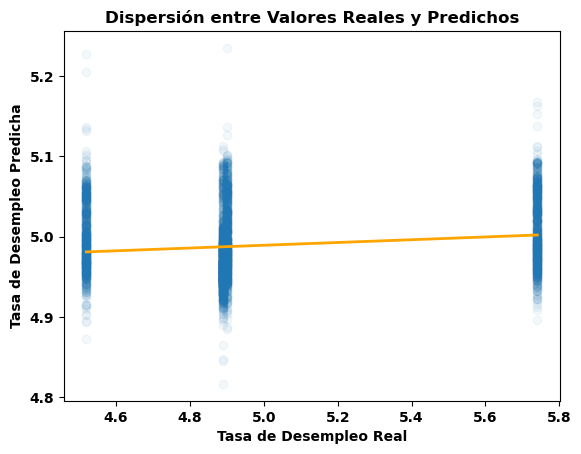

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are NumPy arrays of the same shape

# Calculate the line of trend (ensure y_test and y_pred have the same shape)
m, c = np.polyfit(y_test, y_pred, 1)  # Calculate slope (m) and intercept (c)
x = np.linspace(min(y_test), max(y_test), 100)  # Generate 100 equally spaced points
y = m * x + c  # Calculate y values for each x using the equation

# Scatter plot of predictions and real values
plt.scatter(y_test, y_pred, alpha=0.05)
plt.xlabel("Tasa de Desempleo Real")
plt.ylabel("Tasa de Desempleo Predicha")
plt.title("Dispersión entre Valores Reales y Predichos")

# Add the trend line in orange
plt.plot(x, y, color="orange", linewidth=2)

plt.show()


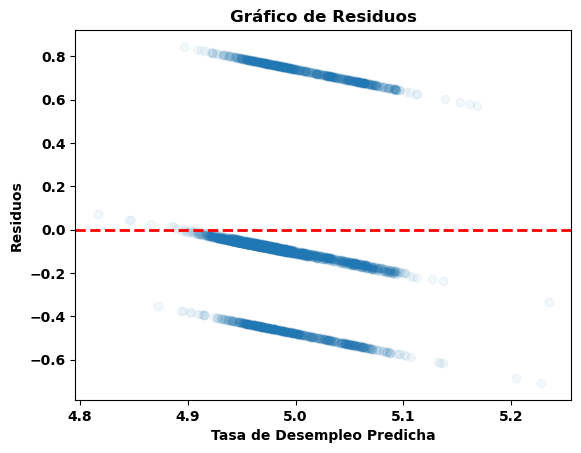

In [18]:
import matplotlib.pyplot as plt

# Calcular los residuos
residuos = y_test - y_pred

# Scatter plot de los residuos
plt.scatter(y_pred, residuos, alpha=0.05)
plt.xlabel("Tasa de Desempleo Predicha")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Línea horizontal en y=0
plt.show()


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Seleccionar las variables independientes y dependiente
X = df.drop(['tasa_desempleo', 'id_persona', 'gestion'], axis=1)  
y = df['tasa_desempleo']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Definir los parámetros a explorar en la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Crear el modelo de Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados por la búsqueda en cuadrícula
best_params = grid_search.best_params_

# Imprimir los mejores parámetros
print("Mejores parámetros encontrados por la búsqueda en cuadrícula:")
print(best_params)

# Obtener el modelo con los mejores parámetros
best_gradient_boosting_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_gradient_boosting_model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Imprimir las métricas
print("\nMétricas con los mejores parámetros:")
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2e}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2e}".format(rmse))
print("R-squared (R2): {:.2f}".format(r2))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape * 100))


Mejores parámetros encontrados por la búsqueda en cuadrícula:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}

Métricas con los mejores parámetros:
Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 1.50e-01
Root Mean Squared Error (RMSE): 3.87e-01
R-squared (R2): 0.02
Mean Absolute Percentage Error (MAPE): 5.43%


In [21]:
# Asegúrate de que 'gestion' esté presente en el conjunto de entrenamiento
X = df.drop(['tasa_desempleo', 'id_persona'], axis=1)
y = df['tasa_desempleo']

df_predicciones_copia=df_predicciones.copy()

# Asegúrate de que 'gestion' esté presente en el conjunto de predicciones
X_predicciones = df_predicciones_copia.drop(['tasa_desempleo', 'id_persona'], axis=1)

# Guardar la variable 'gestion' del conjunto de predicciones antes de quitarla
gestion_predicciones = X_predicciones['gestion']

# Quitar la variable 'gestion' de las variables independientes
X = X.drop(['gestion'], axis=1)
X_predicciones = X_predicciones.drop(['gestion'], axis=1)

# One-hot encoding para manejar variables categóricas
X = pd.get_dummies(X)
X_predicciones = pd.get_dummies(X_predicciones)

# Asegúrate de que las columnas en 'X_predicciones' coincidan con las columnas en 'X'
X_predicciones = X_predicciones.reindex(columns=X.columns, fill_value=0)

# Crear el modelo de Gradient Boosting Regressor (usar los hiperparámetros que consideres mejores)
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

# Entrenar el modelo con todo el conjunto original (puedes ajustar esto si prefieres)
gradient_boosting_model.fit(X, y)

# Realizar predicciones en el conjunto de predicciones
y_predicciones = gradient_boosting_model.predict(X_predicciones)

# Agregar nuevamente la variable 'gestion' a las predicciones
predicciones_df = pd.DataFrame({'gestion': gestion_predicciones, 'tasa_desempleo_predicha': y_predicciones})

# Imprimir las predicciones
print("\nPredicciones:")
print(predicciones_df)




Predicciones:
      gestion  tasa_desempleo_predicha
0        2020                 4.967483
1        2020                 4.995024
2        2020                 4.979668
3        2020                 4.951527
4        2021                 4.944845
...       ...                      ...
2905     2021                 4.997219
2906     2021                 4.959999
2907     2020                 4.960360
2908     2020                 4.993076
2909     2020                 4.931461

[2910 rows x 2 columns]


In [22]:
# Calcular la media de la tasa de desempleo para cada gestión
media_gestion_2020 = predicciones_df[predicciones_df['gestion'] == 2020]['tasa_desempleo_predicha'].mean()
media_gestion_2021 = predicciones_df[predicciones_df['gestion'] == 2021]['tasa_desempleo_predicha'].mean()

# Imprimir las medias
print("Media de la tasa de desempleo para la gestión 2020: {:.4f}".format(media_gestion_2020))
print("Media de la tasa de desempleo para la gestión 2021: {:.4f}".format(media_gestion_2021))


Media de la tasa de desempleo para la gestión 2020: 4.9888
Media de la tasa de desempleo para la gestión 2021: 4.9910


In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


MSE: 0.14936959761095375
RMSE: 0.3864836317503676
R2: 0.023312350080378685
Adjusted R-squared: 0.01
MAE: 0.2796736500789121
MAPE: 0.054334910158768124
Concordance Index (C-index): 0.02
       gestion  tasa_desempleo_real  tasa_desempleo_predicha
6020      2017                 5.74                 5.002390
8845      2017                 5.74                 4.932254
19477     2019                 4.89                 4.968148
21672     2019                 4.89                 4.981713
17416     2019                 4.89                 5.011013
...        ...                  ...                      ...
20523     2019                 4.89                 4.999198
11183     2018                 4.90                 5.095445
18326     2019                 4.89                 5.005830
10764     2018                 4.90                 4.964742
22185     2019                 4.89                 4.985630

[3926 rows x 3 columns]

Resultados de la validación cruzada (neg_mean_squared_err

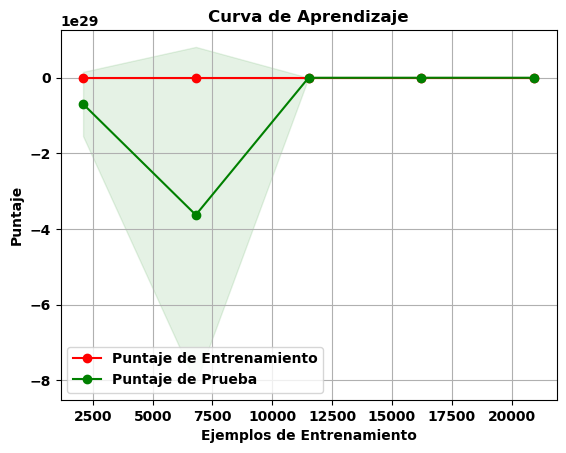

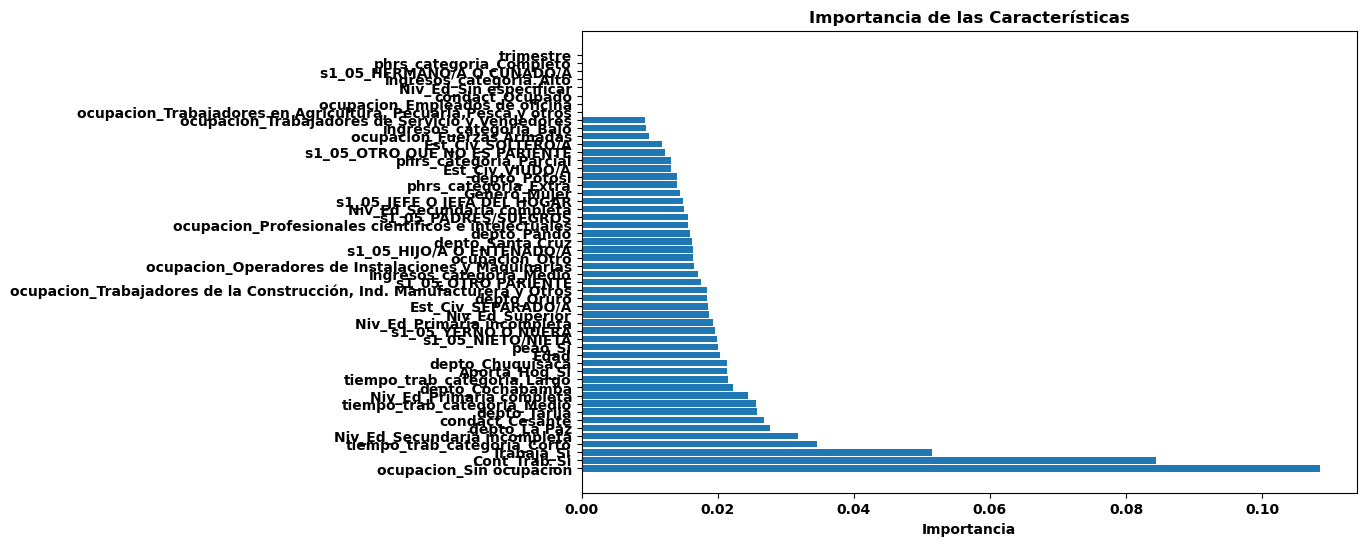

In [25]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Cargar el conjunto de datos
data = df

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data.drop(["tasa_desempleo", "id_persona"], axis=1)  
y = data["tasa_desempleo"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Excluir temporalmente 'gestion' del conjunto de entrenamiento
X_train_without_gestion = X_train.drop("gestion", axis=1)

# Crear el modelo XGBoost con regularización L2
model = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=5,
    n_estimators=50,
    subsample=0.5,
    reg_lambda=1.0,
    reg_alpha=0
)

# Entrenar el modelo sin 'gestion'
model.fit(X_train_without_gestion, y_train)

# Hacer predicciones en el conjunto de prueba
X_test_without_gestion = X_test.drop("gestion", axis=1)
y_pred = model.predict(X_test_without_gestion)

# Calcular las métricas, incluyendo el RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calcula la raíz cuadrada del MSE para obtener RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular el coeficiente de determinación ajustado
n = len(X_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calcular el índice de concordancia
concordance_index = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# Imprimir las métricas, incluyendo el RMSE
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("Adjusted R-squared: {:.2f}".format(adjusted_r2))
print("MAE:", mae)
print("MAPE:", mape)
print("Concordance Index (C-index): {:.2f}".format(concordance_index))

# Crear un DataFrame con las predicciones y las columnas de gestión para su posterior análisis
df_predicciones = pd.DataFrame({'gestion': X_test['gestion'], 'tasa_desempleo_real': y_test, 'tasa_desempleo_predicha': y_pred})
print(df_predicciones)

# Calcular la validación cruzada
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

# Imprimir los resultados de la validación cruzada 
print("\nResultados de la validación cruzada (neg_mean_squared_error):")
print(cv_scores)

# Define la función plot_learning_curve antes de usarla
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Puntaje")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntaje de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntaje de Prueba")

    plt.legend(loc="best")
    return plt

# Visualizar la curva de aprendizaje
plot_learning_curve(model, X, y, cv=5, n_jobs=-1)

# Mostrar el gráfico
plt.show()

# Obtener la importancia de las características
feature_importance = model.feature_importances_
features = X_train_without_gestion.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()


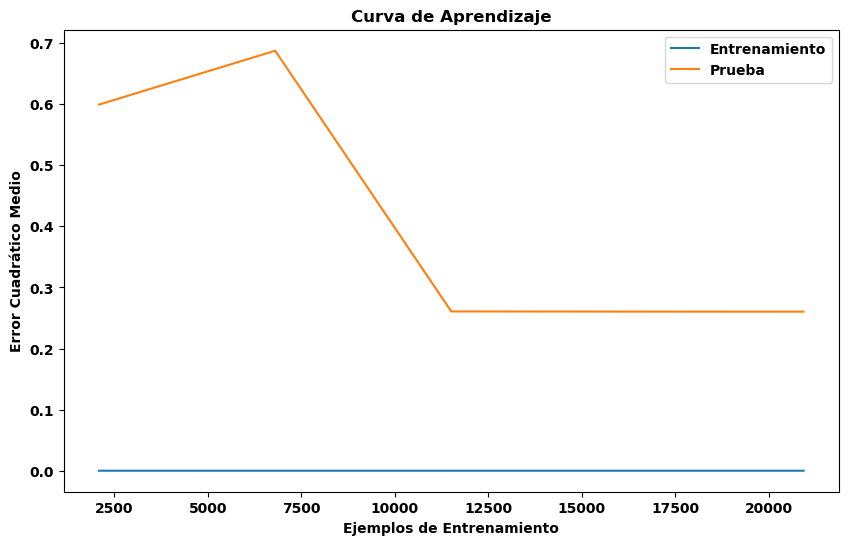

In [26]:
from sklearn.model_selection import learning_curve

def plot_learning_curve_simple(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, -train_scores.mean(axis=1), label='Entrenamiento')
    plt.plot(train_sizes, -test_scores.mean(axis=1), label='Prueba')
    plt.xlabel('Ejemplos de Entrenamiento')
    plt.ylabel('Error Cuadrático Medio')
    plt.title('Curva de Aprendizaje')
    plt.legend()
    plt.show()

# Llamada a la función
plot_learning_curve_simple(model, X, y, cv=5, n_jobs=-1)


In [27]:
# Imprimir la tabla de importancia de características
print("Importancia de las Características:")
print(feature_importance_df)


Importancia de las Características:
                                              Feature  Importance
35                            ocupacion_Sin ocupacion    0.108495
12                                       Cont_Trab_Si    0.084462
39                                         Trabaja_Si    0.051493
46                        tiempo_trab_categoria_Corto    0.034541
24                       Niv_Ed_Secundaria incompleta    0.031823
5                                        depto_La Paz    0.027649
40                                    condact_Cesante    0.026862
10                                       depto_Tarija    0.025752
47                        tiempo_trab_categoria_Medio    0.025635
21                           Niv_Ed_Primaria completa    0.024422
4                                    depto_Cochabamba    0.022270
48                        tiempo_trab_categoria_Largo    0.021541
42                                      Aporta_Hog_Si    0.021374
3                                    dep

In [28]:
import pandas as pd


# Calcular la media de las predicciones para cada año de gestión
mean_predictions_df = df_predicciones.groupby('gestion')['tasa_desempleo_predicha'].mean().reset_index()

# Imprimir las predicciones medias
print("\nPredicciones Medias:")
print(mean_predictions_df)



Predicciones Medias:
   gestion  tasa_desempleo_predicha
0     2016                 5.000546
1     2017                 5.011657
2     2018                 5.001789
3     2019                 4.970439


In [29]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Seleccionar las variables independientes y dependiente
X = df.drop(['tasa_desempleo'], axis=1)
y = df['tasa_desempleo']

# Crear el modelo XGBoost
model = xgb.XGBRegressor()

# Realizar validación cruzada con 5 divisiones 
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Calcular el error cuadrático medio promedio a través de las divisiones
mse_mean = np.mean(-cv_scores)

# Imprimir los resultados
print(f'Mean Squared Error (MSE) promedio en validación cruzada: {mse_mean}')


Mean Squared Error (MSE) promedio en validación cruzada: 0.2617937636634263


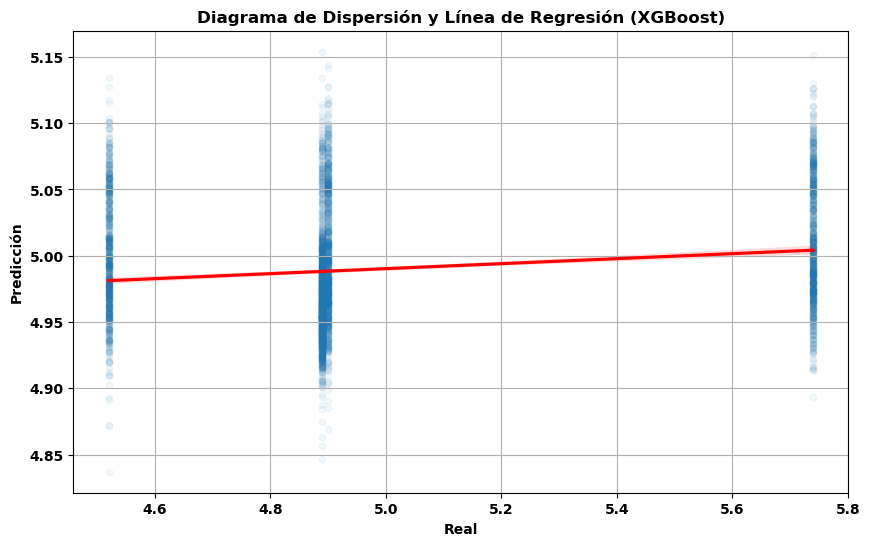

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones y los valores reales desde los conjuntos de prueba
df_result = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.regplot(x='Real', y='Predicción', data=df_result, scatter_kws={'s': 20 , 'alpha': 0.05}, line_kws={'color': 'red'})
plt.title('Diagrama de Dispersión y Línea de Regresión (XGBoost)')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.grid(True)
plt.show()



In [24]:

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define el modelo
xgb_model = XGBRegressor()

# Define la cuadrícula de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
        'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1.0, 2.0, 5.0],
}

# Inicializa el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Ajusta el modelo a los datos
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evalúa el modelo en el conjunto de prueba
mse_grid_search = grid_search.best_estimator_.score(X_test, y_test)
print("Mean Squared Error en conjunto de prueba:", mse_grid_search)



Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 50, 'reg_alpha': 0.5, 'reg_lambda': 1.0}
Mean Squared Error en conjunto de prueba: 0.020876504730537593


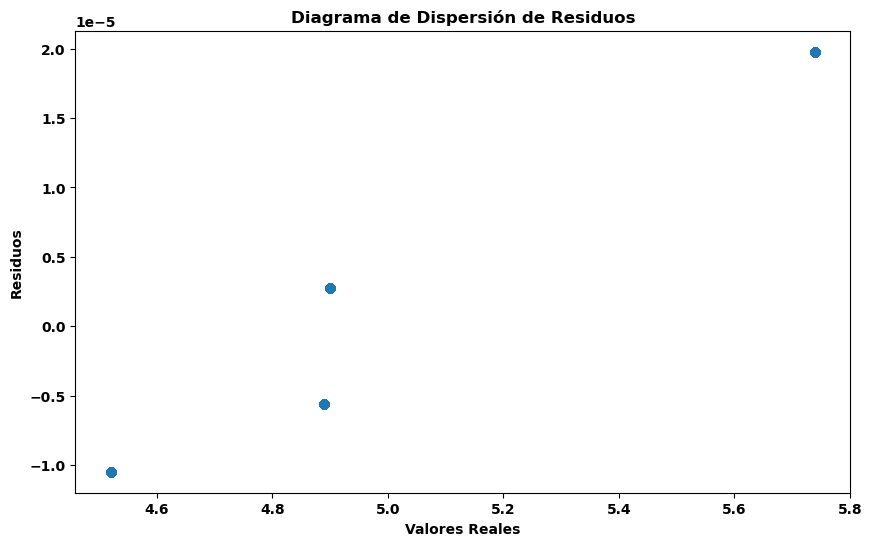

In [31]:
# Asegúrate de haber ejecutado la celda con el ajuste del modelo
model.fit(X_train, y_train)

# Agrega la columna 'gestion' al conjunto de prueba
X_test_without_gestion['gestion'] = df_predicciones['gestion']

# Asegúrate de que las características estén en el mismo orden
X_test_without_gestion = X_test_without_gestion[X_train.columns]

# Ahora, intenta hacer predicciones
y_pred = model.predict(X_test_without_gestion)

# Calcula los residuos
residuals = y_test - y_pred

# Grafica un diagrama de dispersión de los residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.title('Diagrama de Dispersión de Residuos')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.show()



In [43]:
import pandas as pd
import xgboost as xgb

# Verificar si 'id_persona' está presente en df_predicciones
if 'id_persona' in df_predicciones.columns:
    # Crear una copia del DataFrame de predicciones sin 'id_persona'
    df_predicciones_xg = df_predicciones.drop(columns=['id_persona'])
else:
    # Si 'id_persona' no está presente, simplemente usar el DataFrame original
    df_predicciones_xg = df_predicciones.copy()

# Crear una copia del conjunto de características de predicciones ficticias
X_predicciones_fic = df_predicciones_xg.copy()

# Agregar la columna 'gestion' al conjunto de características de predicciones ficticias
X_predicciones_fic['gestion'] = df_predicciones['gestion']

# Obtener las columnas esperadas por el modelo
expected_columns = model.get_booster().feature_names

# Verificar si hay alguna columna faltante en X_predicciones_fic
missing_columns = set(expected_columns) - set(X_predicciones_fic.columns)

# Asegurarse de que X_predicciones_fic tenga todas las columnas esperadas
X_predicciones_fic = X_predicciones_fic.reindex(columns=expected_columns, fill_value=0)

# Hacer predicciones en el conjunto de predicciones ficticias
y_predicciones_fic = model.predict(X_predicciones_fic)

# Crear un DataFrame con las predicciones ficticias y la columna de gestión
df_resultado = pd.DataFrame({'gestion': df_predicciones['gestion'], 'tasa_desempleo_predicha': y_predicciones_fic})

# Filtrar solo las gestiones 2020 y 2021
df_resultado_filtrado = df_resultado[df_resultado['gestion'].isin([2020, 2021])]

# Imprimir el DataFrame filtrado
print(df_resultado_filtrado)



      gestion  tasa_desempleo_predicha
0        2021                 4.890006
1        2020                 4.890006
2        2020                 4.890006
3        2020                 4.890006
4        2021                 4.890006
...       ...                      ...
2905     2020                 4.890006
2906     2021                 4.890006
2907     2021                 4.890006
2908     2020                 4.890006
2909     2020                 4.890006

[2910 rows x 2 columns]


In [44]:
# Calcular la media para el año 2020
media_2020 = df_resultado[df_resultado['gestion'] == 2020]['tasa_desempleo_predicha'].mean()

# Calcular la media para el año 2021
media_2021 = df_resultado[df_resultado['gestion'] == 2021]['tasa_desempleo_predicha'].mean()

print(f"Media para el año 2020: {media_2020}")
print(f"Media para el año 2021: {media_2021}")


Media para el año 2020: 4.890006065368652
Media para el año 2021: 4.890006065368652
